# Process screening data

In [1]:
import sys
sys.path.append("../src/")

import numpy as np

import matplotlib.pyplot as plt

from mask import simulate_mask
from plotting import plot_profile, plot_hmap
from splitting import train_val_split
from screening_data_generator.from_file import matlab_to_ndarray

%matplotlib inline

In [2]:
SEED = 42

# Location where data matrix and masks will be stored.
PATH_TO_DATA = "/Users/sela/Desktop/recsys/data/screening_data/"

# Load screening data from file

In [3]:
# Load screening data from matlab file into numpy array.
X = matlab_to_ndarray("/Users/sela/phd/data/real/data_matrix_3m.mat", "X")

# Training and validation sets

In [4]:
prediction_window = 4

O_val, O_train = train_val_split(X, prediction_window, method='last_observed', seed=SEED)

X_val = X * O_val
X_train = X * O_train

# Inspect

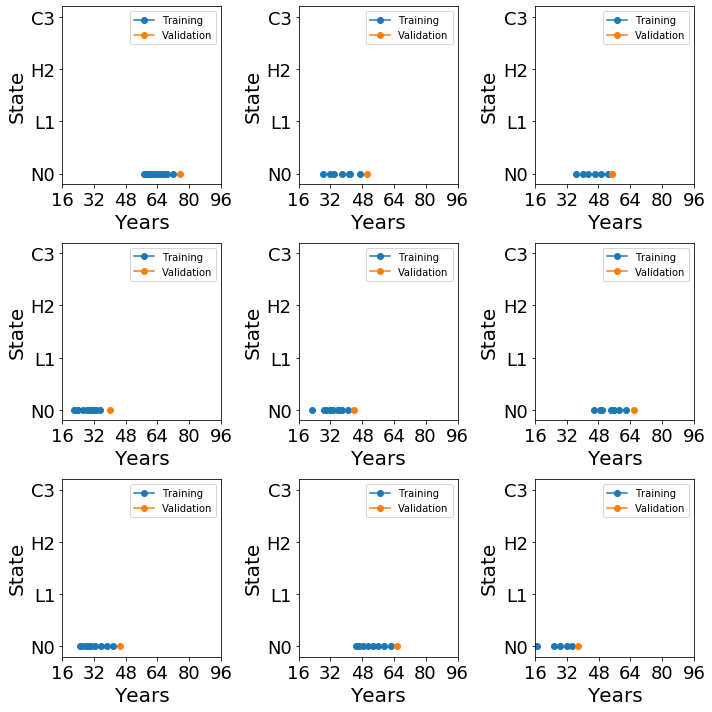

In [5]:
_, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    
    # Add plot to figure.
    plot_profile(X_train[num], axis, show=False, label='Training')
    plot_profile(X_val[num], axis, show=False, label='Validation')
    
    axis.legend()

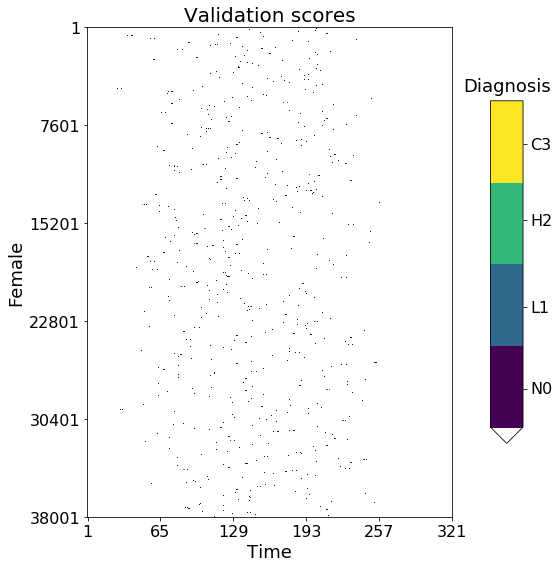

States: [1. 2. 3. 4.]
Counts: [41424  1614   929    85]
Number of all-zero profiles: 0


In [6]:
fig = plt.figure(figsize=(8, 8))
plt.title("Validation scores", fontsize=20)
plot_hmap(fig, X_val)

vals, cnts = np.unique(X_val[X_val != 0], return_counts=True)
print('States:', vals)
print('Counts:', cnts)

# Sanity check.
print('Number of all-zero profiles:', len(np.squeeze(np.where(np.sum(X_val, axis=1) == 0))))

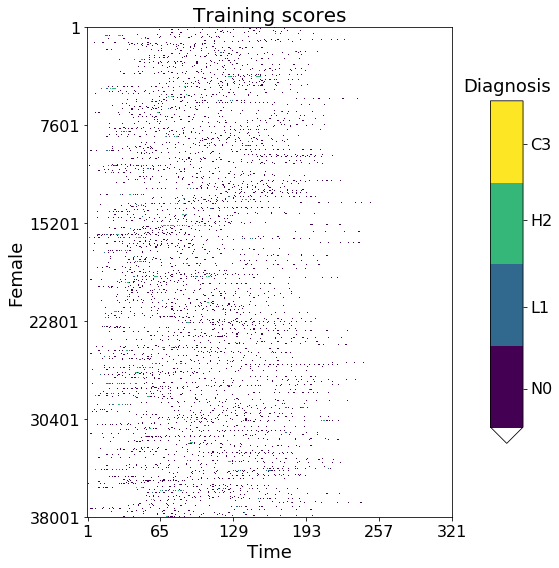

States: [1. 2. 3. 4.]
Counts: [284621  14715   7292     42]
Number of all-zero profiles: 0


In [7]:
fig = plt.figure(figsize=(8, 8))
plt.title("Training scores", fontsize=20)
plot_hmap(fig, X_train)

vals, cnts = np.unique(X_train[X_train != 0], return_counts=True)
print('States:', vals)
print('Counts:', cnts)

# Sanity check.
print('Number of all-zero profiles:', len(np.squeeze(np.where(np.sum(X_train, axis=1) == 0))))

# Save data to disk

In [8]:
np.save(f'{PATH_TO_DATA}/X.npy', X)
np.save(f'{PATH_TO_DATA}/O_val.npy', O_val)
np.save(f'{PATH_TO_DATA}/O_train.npy', O_train)